# import libraries and training and testing

In [ ]:
# !pip install opencv-python
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import librosa
import librosa.display
import matplotlib.pyplot as plt



# MFCC

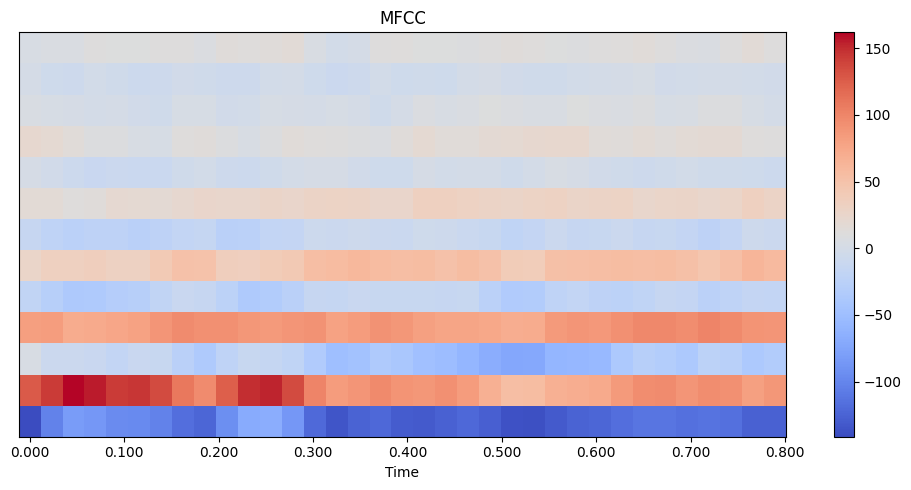

In [ ]:
# MFCC
# Load audio file
audio_file = "/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/drone/Drone_01.wav"
audio, sr = librosa.load(audio_file)

# Extract MFCC features
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Visualize MFCC features
plt.figure(figsize=(10, 5))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [ ]:
sr

22050

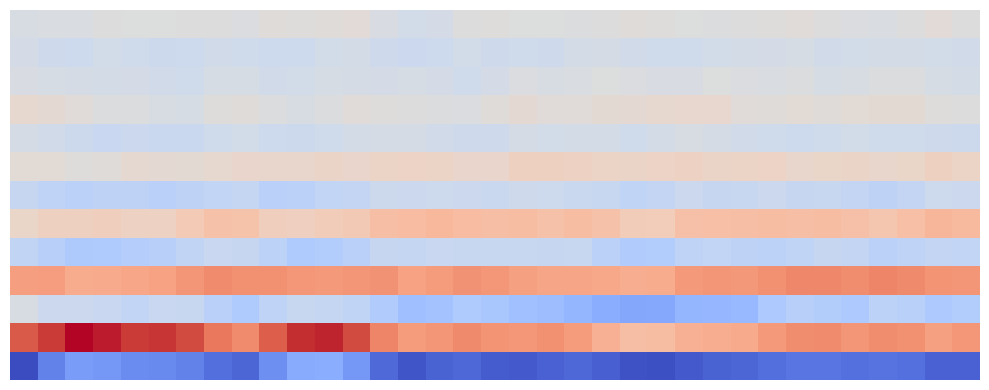

In [ ]:
# Extract MFCC features
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Visualize MFCC features without any labels
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# storing mfcc of all audio file

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Set paths
audio_folder = '/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/noise'
mfcc_folder = 'path_to_mfcc_folder/'

# Create MFCC folder if it does not exist
if not os.path.exists(mfcc_folder):
    os.makedirs(mfcc_folder)

# Loop over audio files in folder
for file_name in os.listdir(audio_folder):
    if file_name.endswith('.wav'):
        # Load audio file
        audio_path = os.path.join(audio_folder, file_name)
        audio, sr = librosa.load(audio_path)

        # Extract MFCC features
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

        # Visualize MFCC features without any labels
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc, x_axis='time')
        plt.axis('off')
        plt.tight_layout()

        # Save MFCC graph as image in MFCC folder
        mfcc_file_name = file_name.replace('.wav', '.png')
        mfcc_path = os.path.join(mfcc_folder, mfcc_file_name)
        plt.savefig(mfcc_path, bbox_inches='tight', pad_inches=0)
        plt.close()


# Stft

In [ ]:
#saved stft without dimension
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file,sr=None)
    ms =  librosa.stft(y, n_fft=2048, hop_length=1024)
    y_drone = np.abs(ms)**2
    y_log_drone = librosa.amplitude_to_db(y_drone, ref=np.max)

    librosa.display.specshow(y_log_drone, sr=sr,x_axis="time",y_axis="linear")

    fig.savefig(image_file)
    plt.close(fig)



def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

create_pngs_from_wavs("/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/noise", "/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/stft_noise")

# Log Mel

In [ ]:
#saved mel spec;trogram without dimension
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file,sr=None)
    ms = librosa.feature.melspectrogram(y=y, sr=sr,n_fft = 8096, hop_length=4000,n_mels=440)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)



def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

create_pngs_from_wavs("/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/noise","/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/log_mel_noise")

# Training and testing

In [ ]:
import os
from PIL import Image

folder_path = '/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/mfcc_folder_drone_yes'

# Get a list of all image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Iterate over the image files and get their dimensions
for file_name in image_files:
    file_path = os.path.join(folder_path, file_name)
    with Image.open(file_path) as img:
        width, height = img.size
        print(f"Image: {file_name}\nDimensions: {width}x{height}\n")


In [ ]:
import os
from PIL import Image

folder_path = "/path/to/your/folder"

# Get a list of all image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Get the count of images
image_count = len(image_files)

# Print the total count
print(f"Total number of images in the folder: {image_count}")


In [ ]:
import os
from PIL import Image

folder_path = '/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/mfcc_folder_drone_yes'

# Get a list of all image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Get the count of images
image_count = len(image_files)

# Print the total count
print(f"Total number of images in the folder: {image_count}")


Total number of images in the folder: 1009


In [ ]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from skimage.feature import hog

# Load the images
drone_present_mfcc_dir = '/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/mfcc_folder_drone_yes'
drone_present_stft_dir = '/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/stft_drone_yes'
drone_not_present_mfcc_dir = '/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/mfcc_folder_noise'
drone_not_present_stft_dir = '/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/stft_noise'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

drone_present_mfcc_images = load_images_from_folder(drone_present_mfcc_dir)
drone_present_stft_images = load_images_from_folder(drone_present_stft_dir)
drone_not_present_mfcc_images = load_images_from_folder(drone_not_present_mfcc_dir)
drone_not_present_stft_images = load_images_from_folder(drone_not_present_stft_dir)

# Preprocess the images
image_size = (128, 128)

def preprocess_images(images, image_size):
    preprocessed_images = []
    for image in images:
        resized_image = cv2.resize(image, image_size)
        preprocessed_images.append(resized_image)
    return preprocessed_images

drone_present_mfcc_images = preprocess_images(drone_present_mfcc_images, image_size)
drone_present_stft_images = preprocess_images(drone_present_stft_images, image_size)
drone_not_present_mfcc_images = preprocess_images(drone_not_present_mfcc_images, image_size)
drone_not_present_stft_images = preprocess_images(drone_not_present_stft_images, image_size)

# Extract features
def extract_features(images):
    features = []
    for image in images:
        hog_features = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), block_norm='L2-Hys', visualize=False)
        features.append(hog_features)
    return features

drone_present_mfcc_features = extract_features(drone_present_mfcc_images)
drone_present_stft_features = extract_features(drone_present_stft_images)
drone_not_present_mfcc_features = extract_features(drone_not_present_mfcc_images)
drone_not_present_stft_features = extract_features(drone_not_present_stft_images)

# Create labels
drone_present_labels = np.ones(len(drone_present_mfcc_features) + len(drone_present_stft_features))
drone_not_present_labels = np.zeros(len(drone_not_present_mfcc_features) + len(drone_not_present_stft_features))

# Concatenate the features and labels
X = np.concatenate((drone_present_mfcc_features, drone_present_stft_features, drone_not_present_mfcc_features, drone_not_present_stft_features), axis=0)
y = np.concatenate((drone_present_labels, drone_not_present_labels), axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Svm

In [ ]:
# Train an SVM
svm_model = svm.SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Evaluate the SVM
y_pred = svm_model.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Classification report:\n', classification_report(y_test, y_pred))


Accuracy: 86.19%
Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       380
         1.0       0.85      0.89      0.87       424

    accuracy                           0.86       804
   macro avg       0.86      0.86      0.86       804
weighted avg       0.86      0.86      0.86       804



In [ ]:
from sklearn.svm import SVC

# Create a SVM model with cubic kernel
svm_model = SVC(kernel='poly', degree=3)

# Train the model using the training set
svm_model.fit(X_train, y_train)

# Predict using the trained model
y_pred = svm_model.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 88.93%
Classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       380
         1.0       0.88      0.92      0.90       424

    accuracy                           0.89       804
   macro avg       0.89      0.89      0.89       804
weighted avg       0.89      0.89      0.89       804



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameter search space
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10]
}

# Create an SVM classifier
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding performance
print('Best hyperparameters:', grid_search.best_params_)
print('Best validation accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))


Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best validation accuracy: 89.10%


In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier with the best hyperparameters
svm_model = SVC(C=10, gamma=0.1, kernel='rbf')

# Train the SVM on the entire training set
svm_model.fit(X_train, y_train)

# Evaluate the SVM on the test set
y_pred = svm_model.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Classification report:\n', classification_report(y_test, y_pred))


Accuracy: 91.54%
Classification report:
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       380
         1.0       0.92      0.92      0.92       424

    accuracy                           0.92       804
   macro avg       0.92      0.92      0.92       804
weighted avg       0.92      0.92      0.92       804



In [ ]:
# Train an SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = clf.predict(X_test)

# Print the classification report and accuracy score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       380
         1.0       0.85      0.89      0.87       424

    accuracy                           0.86       804
   macro avg       0.86      0.86      0.86       804
weighted avg       0.86      0.86      0.86       804

Accuracy: 0.8619402985074627
Sensitivity: 0.8915094339622641
Specificity: 0.8289473684210527


In [ ]:
# Create SVM classifier
clf = svm.SVC(kernel='poly', degree=3)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy, sensitivity, and specificity
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification report:\n", report)


Accuracy: 0.8893034825870647
Classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       380
         1.0       0.88      0.92      0.90       424

    accuracy                           0.89       804
   macro avg       0.89      0.89      0.89       804
weighted avg       0.89      0.89      0.89       804



In [ ]:
# save model
import joblib

# Save the trained SVM model to a file
filename = 'svm_model.pkl'
joblib.dump(svm_model, filename)

# Load the saved SVM model from a file
svm_model = joblib.load(filename)


In [ ]:
# Load the saved SVM model from a file
filename = 'svm_model.pkl'
svm_model = joblib.load(filename)


In [ ]:
# save modely*
import joblib

# Save the trained SVM model to a file
filename = 'svm_model.h5'
joblib.dump(svm_model, filename)

# Load the saved SVM model from a file
svm_model = joblib.load(filename)


In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
import joblib

# Load the saved SVM model from a file
svm_model = joblib.load('svm_model.pkl')

# Define the function to predict the output
def predict(image_path):
    # Load the image and preprocess it
    image_size = (128, 128)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, image_size)

    # Extract features from the image
    hog_features = hog(resized_image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), block_norm='L2-Hys', visualize=False)
    features = np.array([hog_features])

    # Predict the output
    output = svm_model.predict(features)

    # Print the result
    if output == 1:
        print("Drone is present")
    else:
        print("Drone is not present")

# Call the predict function with the path of the test image
predict('/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/stft_drone_yes/Drone_01.png')


Drone is present


In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

# Define kernel functions to use
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize lists to store accuracy and sensitivity/specificity for each event
accuracy_scores = []
sensitivity_present = []
specificity_present = []
sensitivity_not_present = []
specificity_not_present = []

# Iterate through each kernel function
for kernel in kernel_functions:

    # Initialize SVM models for both present and not present events
    svm_model_present = svm.SVC(kernel=kernel, C=1.0)
    svm_model_not_present = svm.SVC(kernel=kernel, C=1.0)

    # Fit the models on the training data
    svm_model_present.fit(X_train, y_train_present)
    svm_model_not_present.fit(X_train_not_present, y_train_not_present)

    # Predict on the test data
    y_pred_present = svm_model_present.predict(X_test_present)
    y_pred_not_present = svm_model_not_present.predict(X_test_not_present)

    # Combine the predictions and actual labels for both present and not present events
    y_pred = np.concatenate((y_pred_present, y_pred_not_present))
    y_test = np.concatenate((y_test_present, y_test_not_present))

    # Calculate accuracy
    accuracy = (y_pred == y_test).sum() / len(y_test)
    accuracy_scores.append(accuracy)

    # Calculate confusion matrix for both present and not present events
    conf_matrix_present = confusion_matrix(y_test_present, y_pred_present)
    conf_matrix_not_present = confusion_matrix(y_test_not_present, y_pred_not_present)

    # Calculate sensitivity and specificity for each event
    sensitivity_p = conf_matrix_present[1, 1] / (conf_matrix_present[1, 0] + conf_matrix_present[1, 1])
    specificity_p = conf_matrix_present[0, 0] / (conf_matrix_present[0, 0] + conf_matrix_present[0, 1])
    sensitivity_np = conf_matrix_not_present[1, 1] / (conf_matrix_not_present[1, 0] + conf_matrix_not_present[1, 1])
    specificity_np = conf_matrix_not_present[0, 0] / (conf_matrix_not_present[0, 0] + conf_matrix_not_present[0, 1])

    # Append the sensitivity/specificity for each event to the corresponding list
    sensitivity_present.append(sensitivity_p)
    specificity_present.append(specificity_p)
    sensitivity_not_present.append(sensitivity_np)
    specificity_not_present.append(specificity_np)

# Create a table to display the results
results_table = pd.DataFrame({
    'Kernel Function': kernel_functions,
    'Accuracy': accuracy_scores,
    'Sensitivity (Present)': sensitivity_present,
    'Specificity (Present)': specificity_present,
    'Sensitivity (Not Present)': sensitivity_not_present,
    'Specificity (Not Present)': specificity_not_present
})

# Display the results
print(results_table)


In [ ]:
# Calculate accuracy, sensitivity, and specificity
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_scores = []
sensitivity_present = []
specificity_present = []
sensitivity_not_present = []
specificity_not_present = []

for kernel in kernel_functions:
    svm_model_present = svm.SVC(kernel=kernel, C=1.0)
    svm_model_present.fit(X_train_present, y_train_present)
    y_pred_present = svm_model_present.predict(X_test_present)

    svm_model_not_present = svm.SVC(kernel=kernel, C=1.0)
    svm_model_not_present.fit(X_train_not_present, y_train_not_present)
    y_pred_not_present = svm_model_not_present.predict(X_test_not_present)

    # Combine the predictions
    y_pred = np.concatenate((y_pred_present, y_pred_not_present))
    y_test = np.concatenate((y_test_present, y_test_not_present))

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Calculate sensitivity and specificity for "drone present" event
    true_positive = np.sum((y_test == 1) & (y_pred == 1))
    false_negative = np.sum((y_test == 1) & (y_pred == 0))
    sensitivity_present.append(true_positive / (true_positive + false_negative))
    specificity_present.append(1 - (false_negative / (true_positive + false_negative)))

    # Calculate sensitivity and specificity for "drone not present" event
    true_negative = np.sum((y_test == 0) & (y_pred == 0))
    false_positive = np.sum((y_test == 0) & (y_pred == 1))
    sensitivity_not_present.append(true_negative / (true_negative + false_positive))
    specificity_not_present.append(1 - (false_positive / (true_negative + false_positive)))

# Print the results in a table
print("Results for SVM classification with MFCC using different kernel functions")
print("{:<10} {:<10} {:<10} {:<10}".format("Kernel", "Accuracy", "Sensitivity (Present)", "Specificity (Present)"))
for i in range(len(kernel_functions)):
    print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f}".format(kernel_functions[i], accuracy_scores[i], sensitivity_present[i], specificity_present[i]))
print("{:<10} {:<10} {:<10} {:<10}".format("", "", "", ""))
print("{:<10} {:<10} {:<10} {:<10}".format("Kernel", "Accuracy", "Sensitivity (Not Present)", "Specificity (Not Present)"))
for i in range(len(kernel_functions)):
    print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f}".format(kernel_functions[i], accuracy_scores[i], sensitivity_not_present[i], specificity_not_present[i]))


# Pre amphasis and windowing

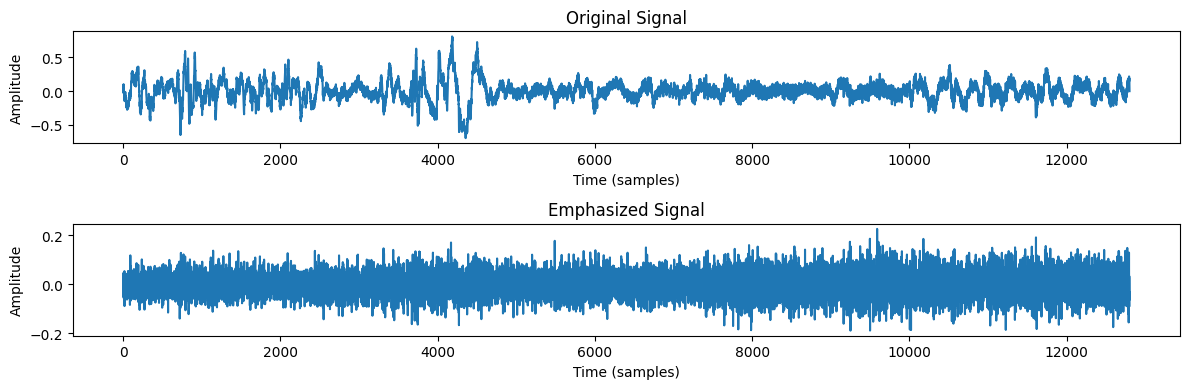

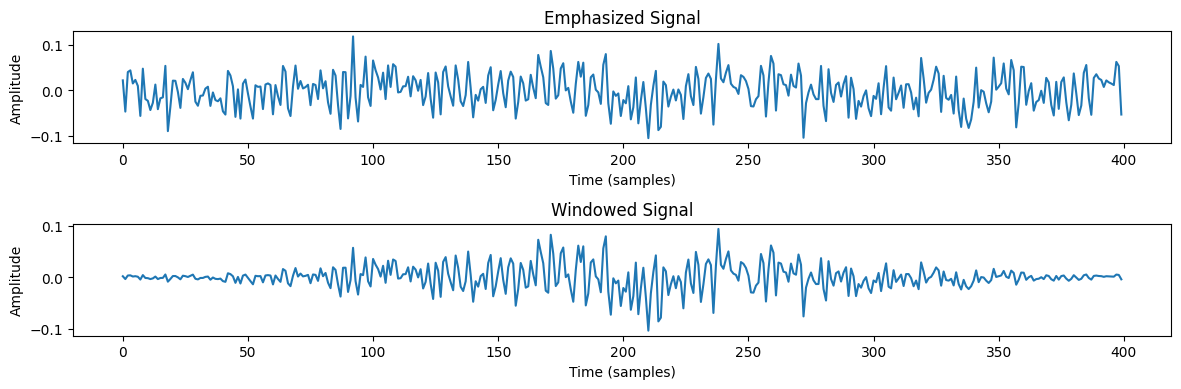

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load audio file
audio_file = "/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/drone/Drone_01.wav"
samples, sample_rate = librosa.load(audio_file, sr=None)

# Set pre-emphasis coefficient
pre_emphasis = 0.97

# Pre-emphasis filter
emphasized_signal = np.append(samples[0], samples[1:] - pre_emphasis * samples[:-1])

# Plot original and emphasized signals
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(samples)
plt.title("Original Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(emphasized_signal)
plt.title("Emphasized Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Set window size and type
win_size = 0.025
win_type = "hamming"

# Convert window size to samples
win_samples = int(win_size * sample_rate)

# Create window function
window = signal.get_window(win_type, win_samples)

# Apply window function to signal
windowed_signal = emphasized_signal[:win_samples] * window

# Plot original and windowed signals
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(emphasized_signal[:win_samples])
plt.title("Emphasized Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(windowed_signal)
plt.title("Windowed Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


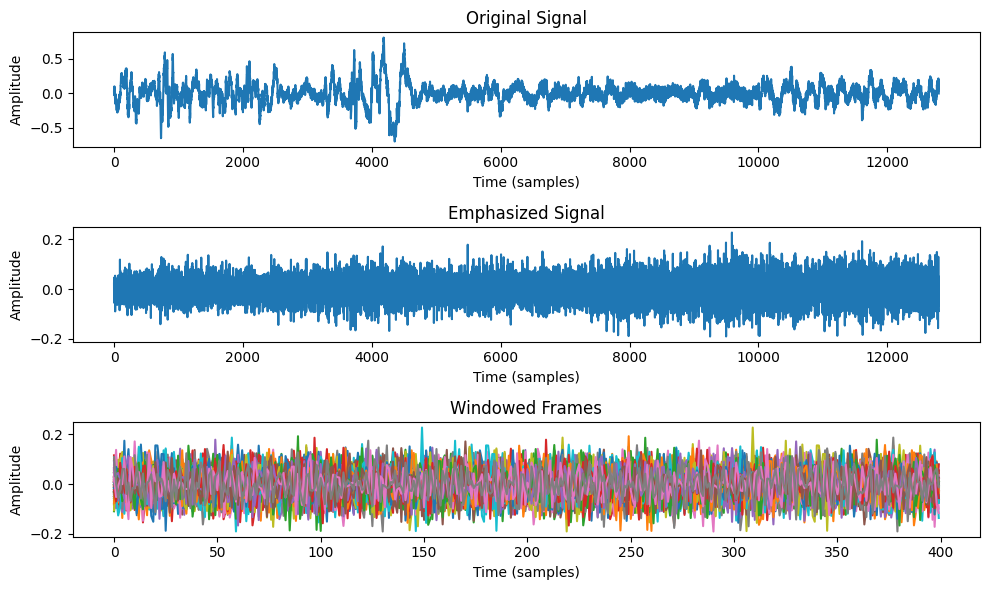

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
audio_file = "/content/drive/MyDrive/Complete_New_two/Binary_Drone_Audio/drone/Drone_01.wav"
y, sr = librosa.load(audio_file, sr=None)

# Pre-emphasis
pre_emphasis = 0.97
emphasized_signal = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

# Windowing
frame_size = 0.025
frame_stride = 0.010
frame_length, frame_step = frame_size * sr, frame_stride * sr
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z)

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

# Plot original signal, emphasized signal, and windowed frames
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(y)
plt.title('Original Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(3,1,2)
plt.plot(emphasized_signal)
plt.title('Emphasized Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
plt.plot(frames.T)
plt.title('Windowed Frames')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# SVM

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_accuracy)


# Random Forest

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest accuracy:", rf_accuracy)


Random Forest accuracy: 0.8694029850746269


# Naive Bayes

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_accuracy)


Naive Bayes accuracy: 0.7412935323383084


# k-Nearest Neighbors (k-NN)

In [ ]:
# k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("k-NN accuracy:", knn_accuracy)

k-NN accuracy: 0.8694029850746269


# Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy:", dt_accuracy)


Decision Tree accuracy: 0.7997512437810945
